In [1]:
using LazySets
using Random
include("src/plotting_utils.jl")
include("src/bruteforce_utils.jl")

coarseness (generic function with 1 method)

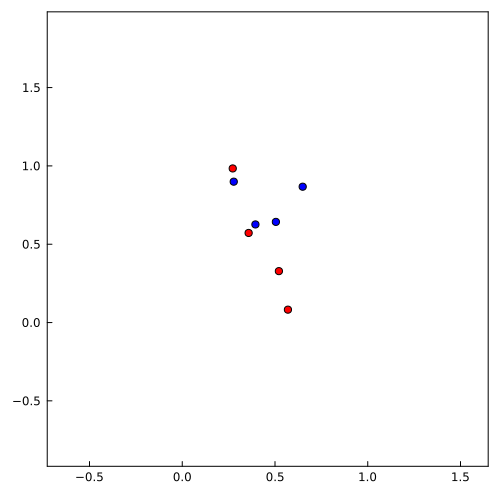

In [2]:
n = 8

S = rand(n,2)
w = rand([-1,1], n)

plot_rb_points(S, w)

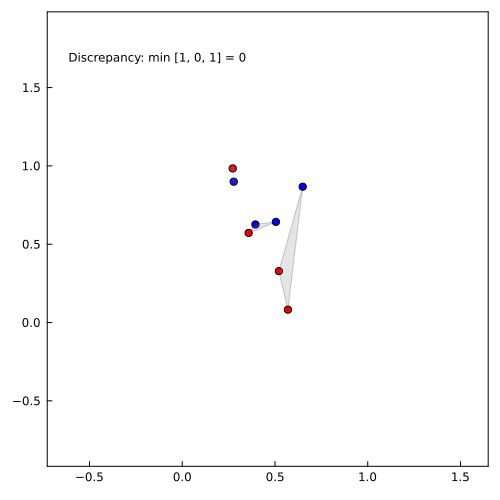

0

In [14]:
# Ejemplo uso diccrepancy()

k = 3
Π = shuffle!(cat(collect(1:k), rand(1:k, n-k), dims=1))
display(plot_rb_points(S, w, Π))
discrepancy(S, w, Π)

In [15]:
# Ejemplo uso relabler()
println(Π)
relabler!(Π, [3,1,2])
println(Π)

[1, 2, 1, 2, 3, 1, 3, 3]
[3, 1, 3, 1, 2, 3, 2, 2]


In [16]:
# Ejemplo uso partitions()
# arma una matriz con todas las particiones de n en k grupos no vacios

partitions(5, 3)

5×25 Matrix{Integer}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  3  3  3  3  3  3  2  2  2  2  2  2  2  2  2  2  2  2  2
 1  3  2  2  2  2  3  2  1  1  1  1  2  1  3  3  3  3  2  2  2  3  3  3  3
 2  1  3  2  3  3  1  3  2  1  2  2  3  2  1  3  1  1  2  3  3  3  2  2  3
 3  2  1  3  2  3  2  1  3  2  1  2  1  3  2  1  3  1  3  2  3  2  3  2  3

In [19]:
# Ejemplo uso coarseness() 
# OJO que es fuerza bruta: exponencial! 
# con n=10 demora aprox 7min en mi compu, con 11 ya no probe...

n = 6
S = rand(n,2)
w = rand([-1,1], n)

# devuelve el valor del coarseness y todas las particiones optimas
c, Π_opt = coarseness(S,w)

println("coarseness = ", c)
Π_opt

coarseness = 2


6×3 Matrix{Integer}:
 1  1  1
 1  3  2
 1  2  3
 1  3  2
 1  1  3
 1  2  1

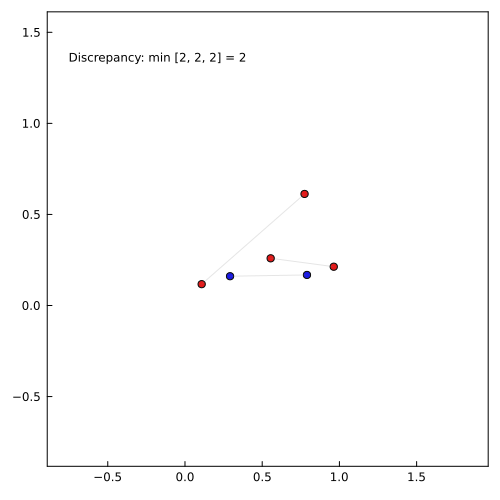

In [22]:
i = 2
plot_rb_points(S,w,Π_opt[:,i])

In [ ]:
n = 10

S = rand(n,2)
w = rand([-1,1], n)

c, Π_opt = coarseness(S,w)

println("coarseness = ", c)
Π_opt